In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from eda_module import *
from clustering_module import *
from regression_module import *

# Import dataset

In [28]:
df = pd.read_csv(r"./data/data_initial.csv")
df

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


# Get basic information about the dataset

In [29]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [30]:
# Get overall statistics about the dataset
df.describe()

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


# Data distributions

<Figure size 640x480 with 0 Axes>

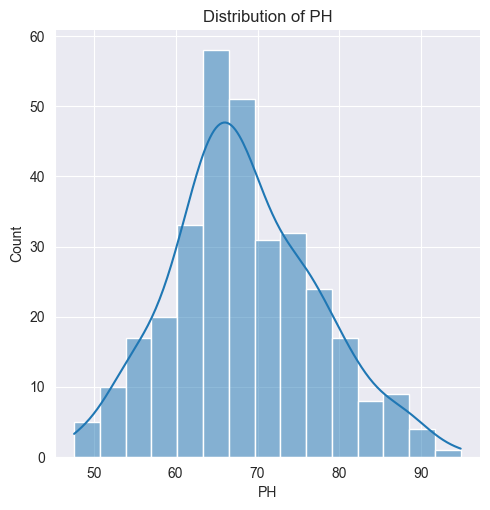

<Figure size 640x480 with 0 Axes>

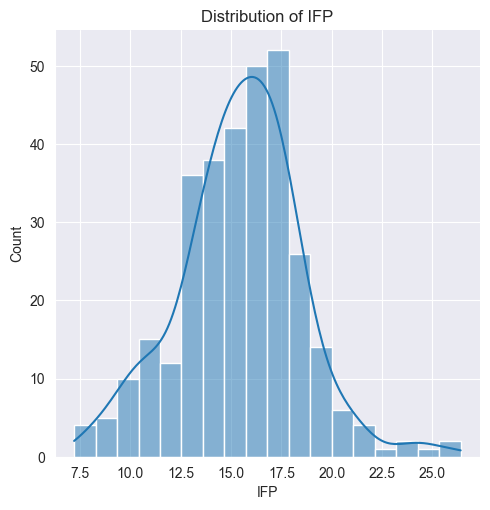

<Figure size 640x480 with 0 Axes>

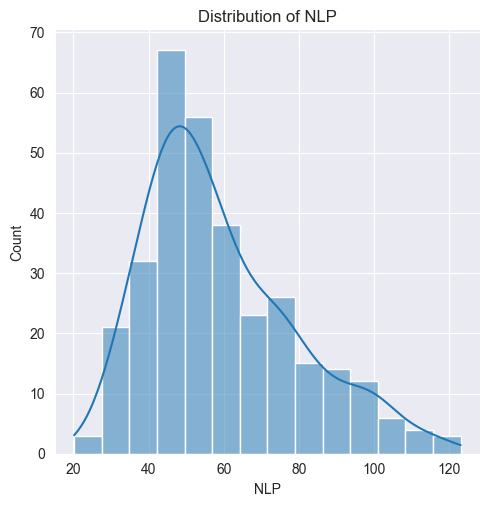

<Figure size 640x480 with 0 Axes>

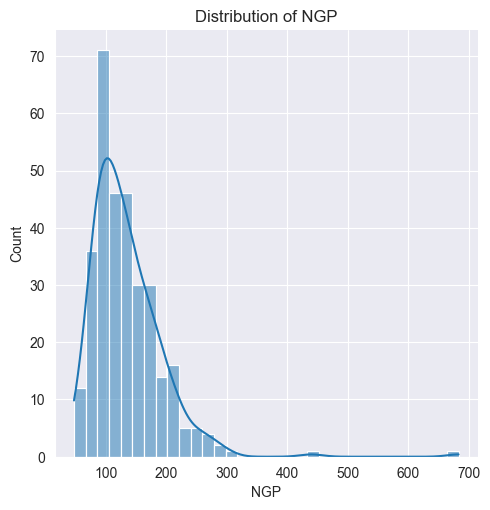

<Figure size 640x480 with 0 Axes>

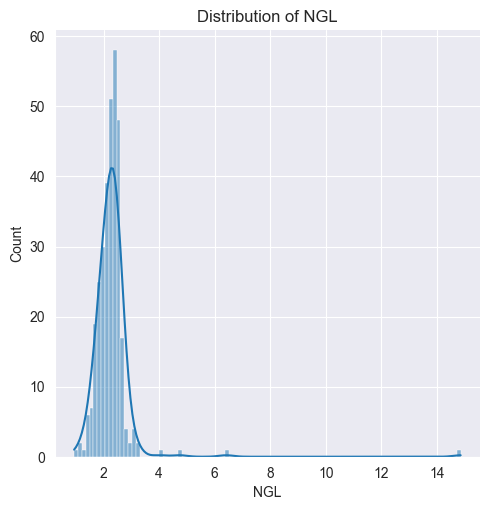

<Figure size 640x480 with 0 Axes>

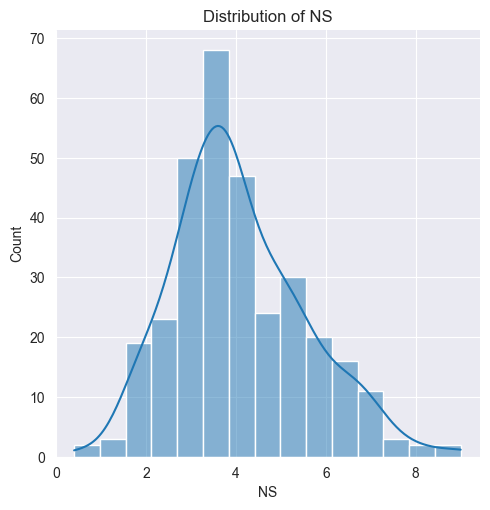

<Figure size 640x480 with 0 Axes>

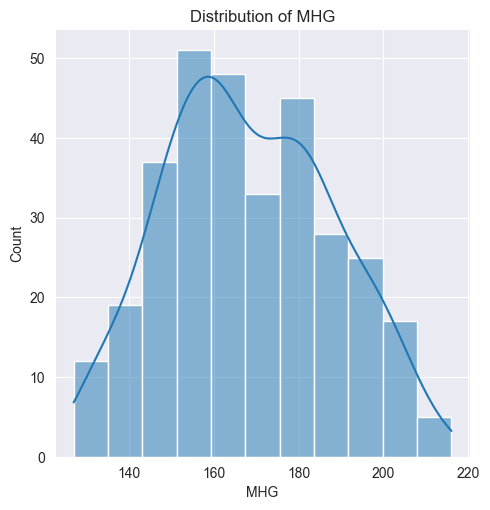

<Figure size 640x480 with 0 Axes>

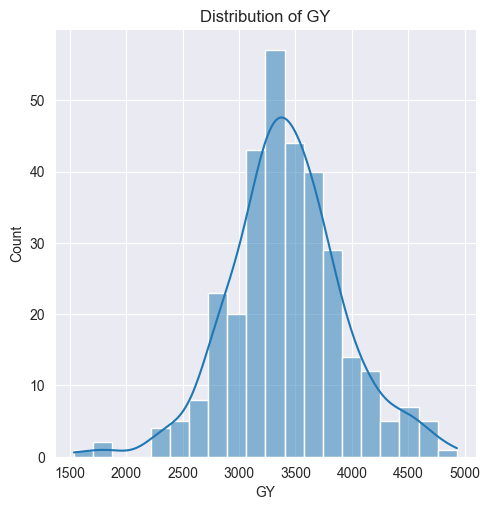

In [31]:
visualize_data_distribution(df)

# Top cultivars by grain yield

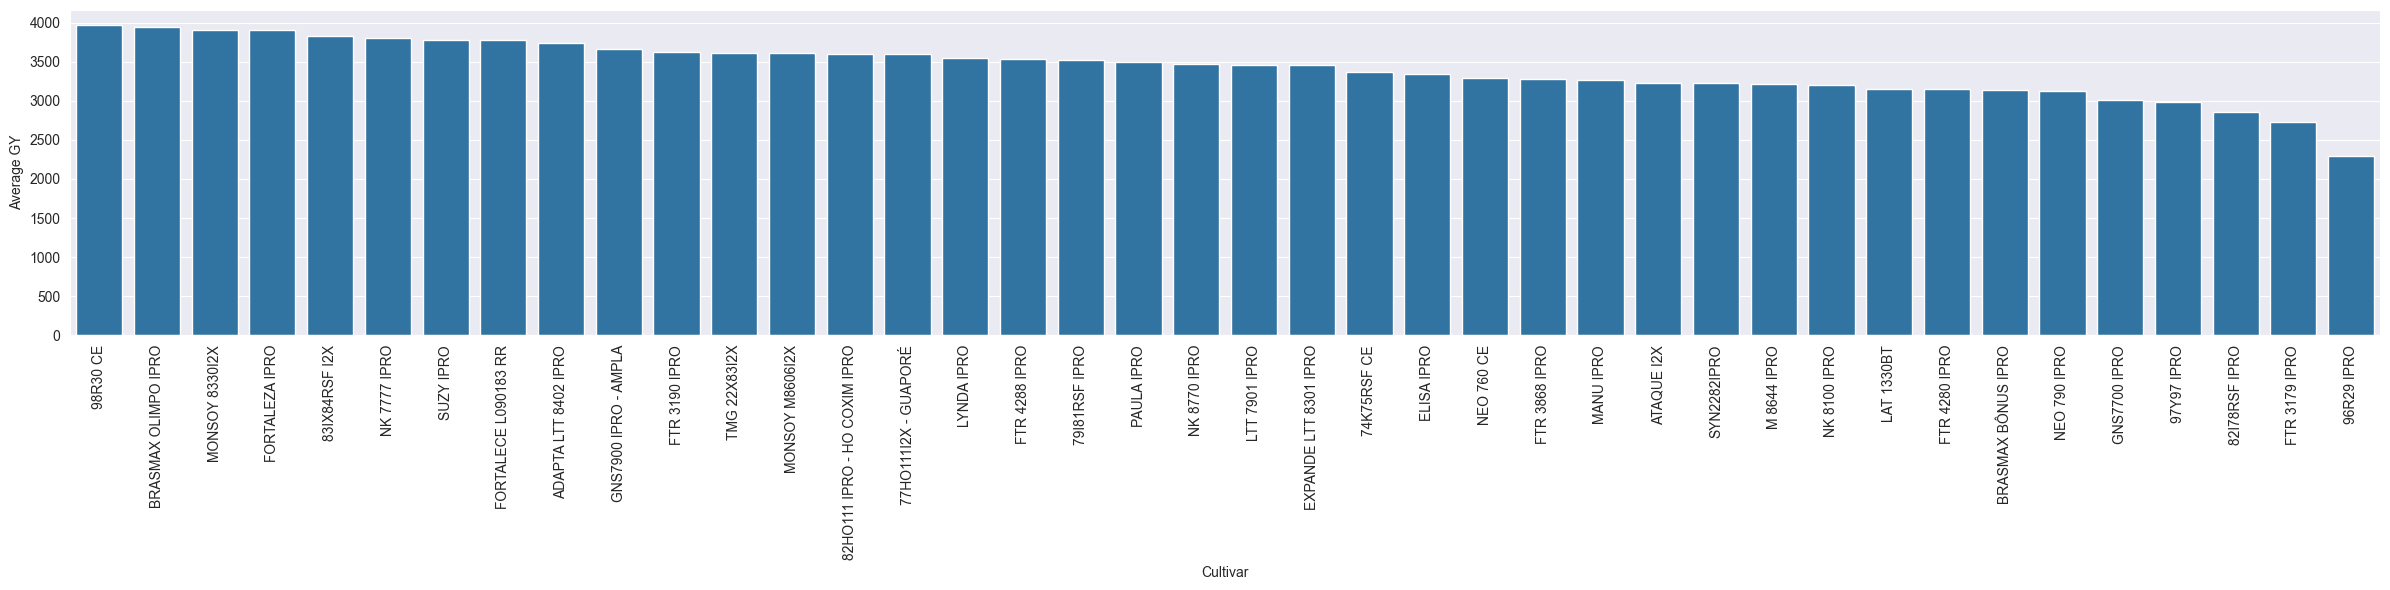

In [32]:
show_best_cultivars_gy(df)

# Difference in GY and MHG in Season 1 and Season 2

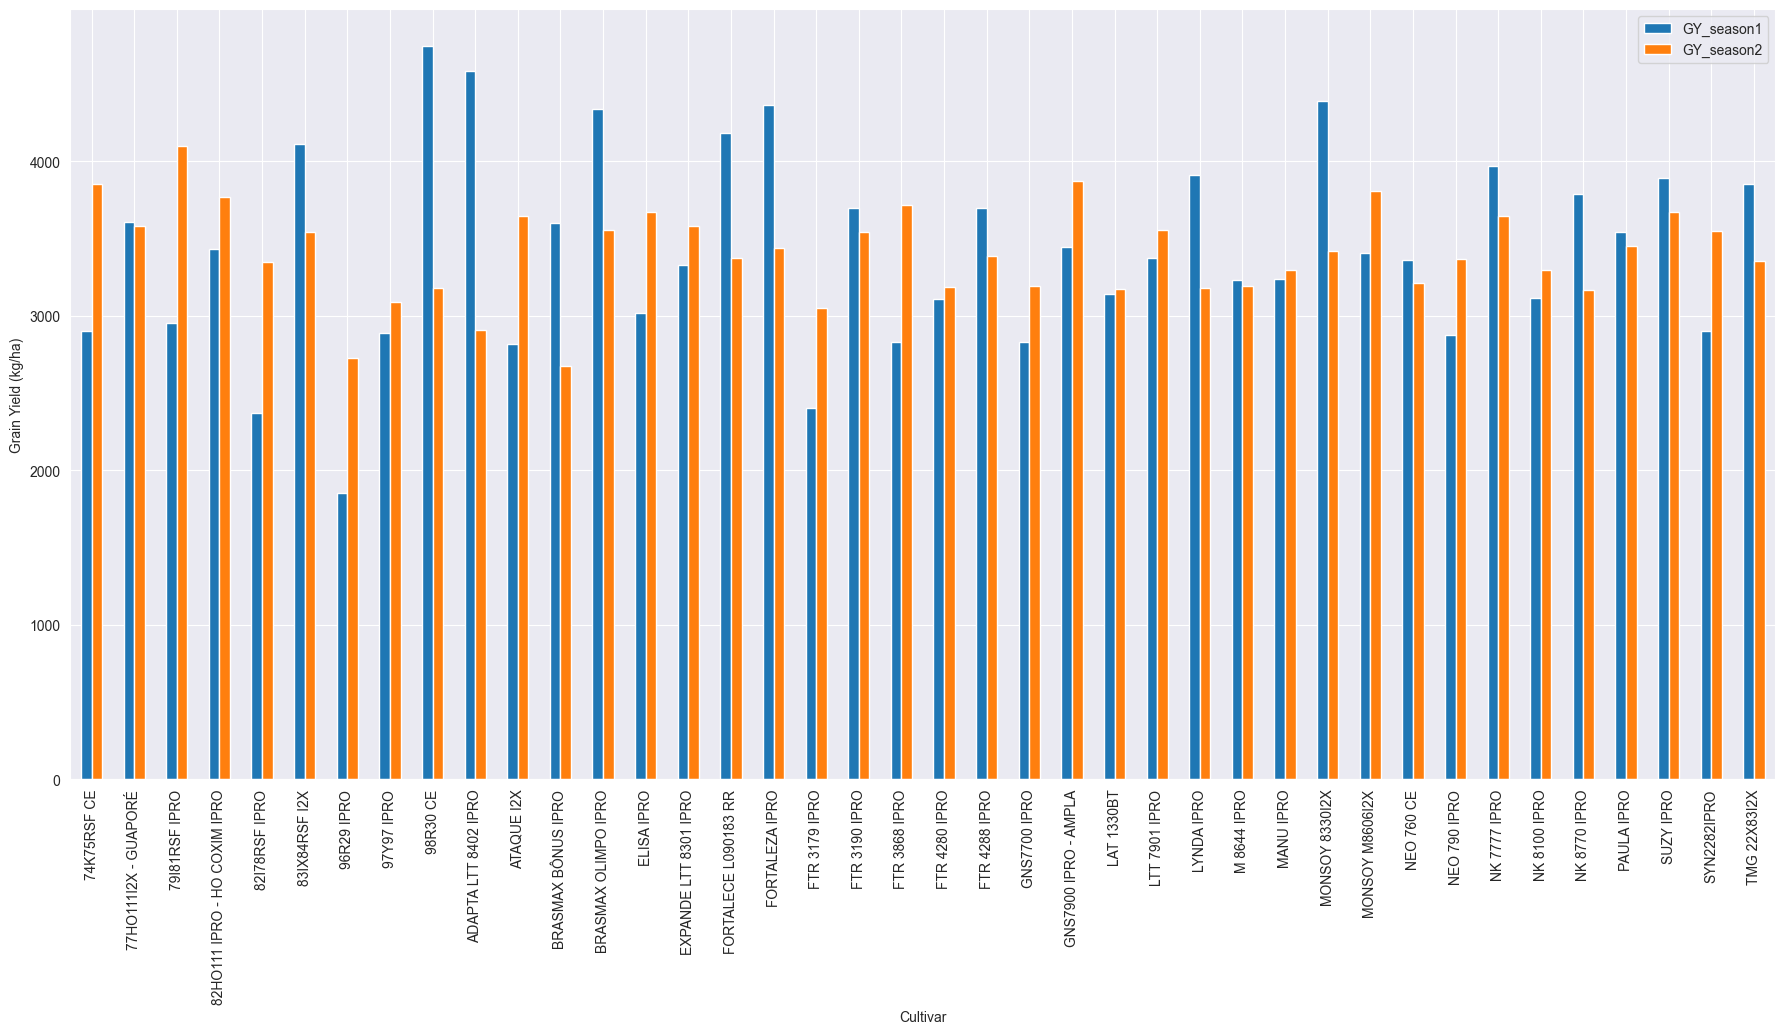

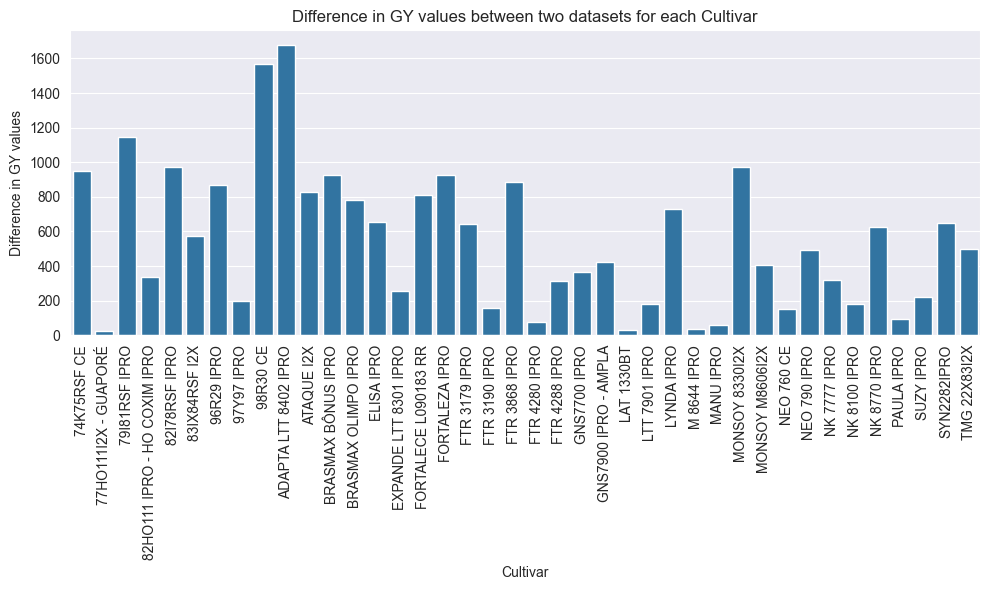

In [33]:
show_delta(df, "GY")

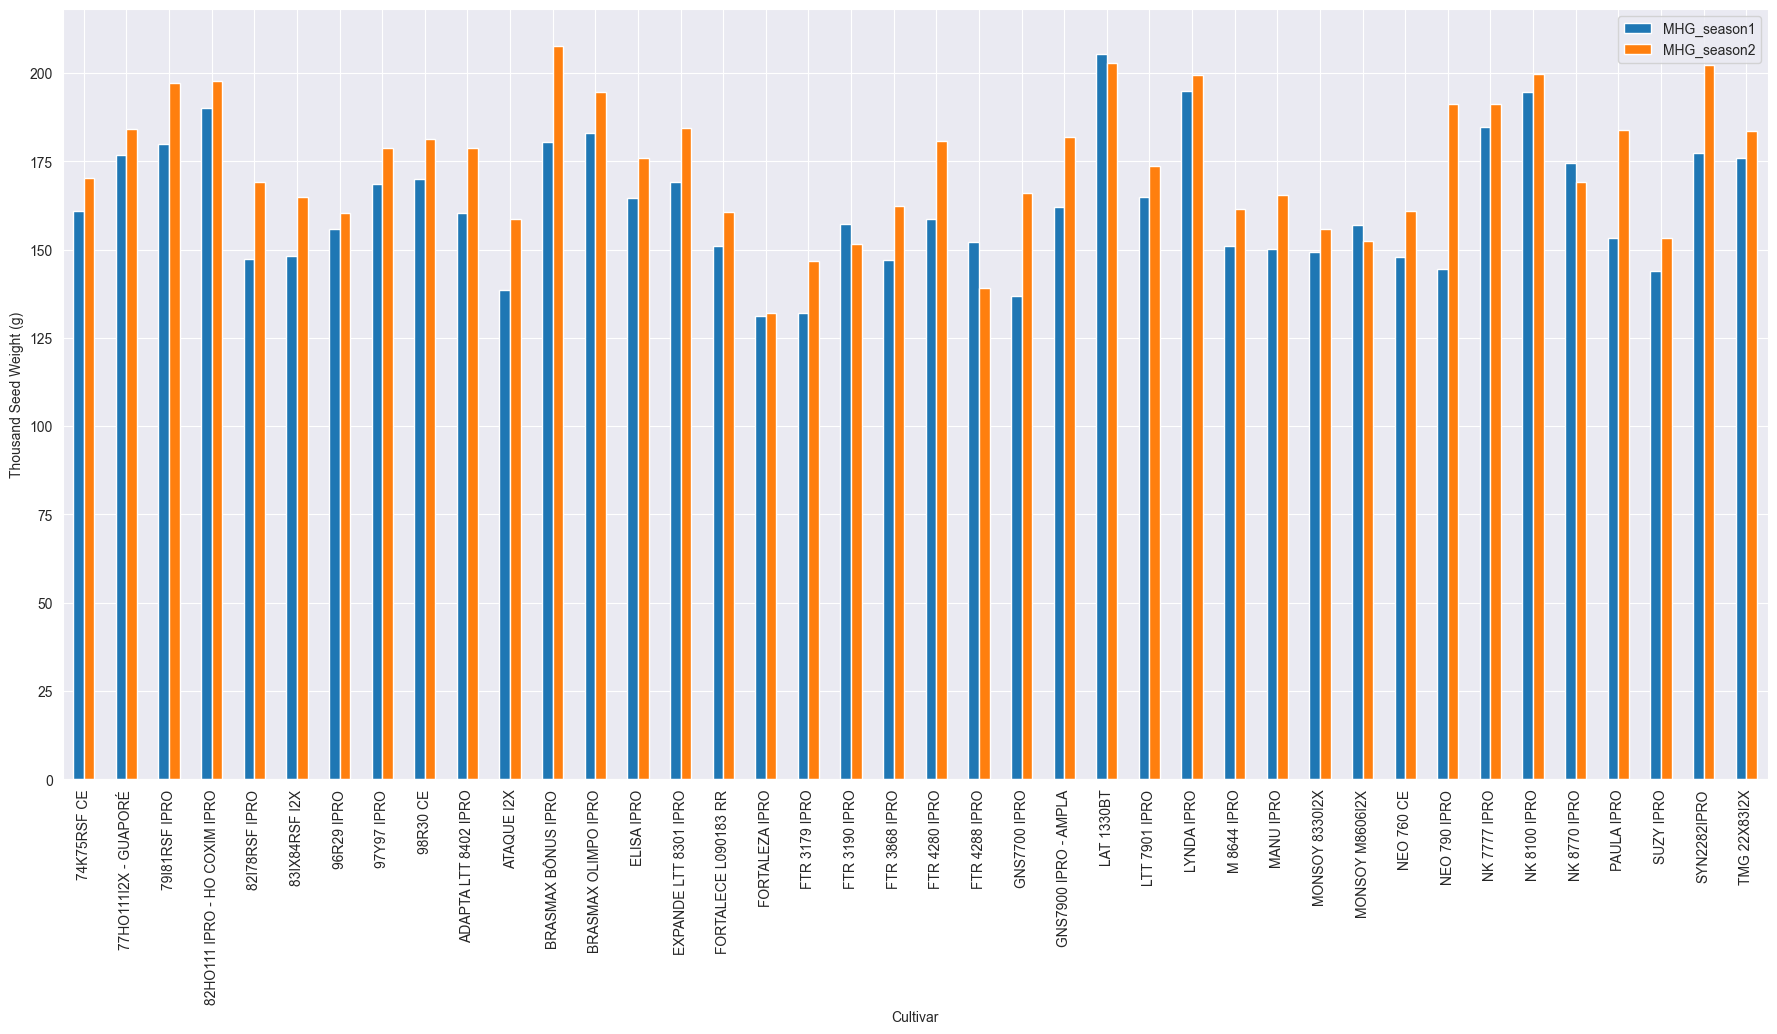

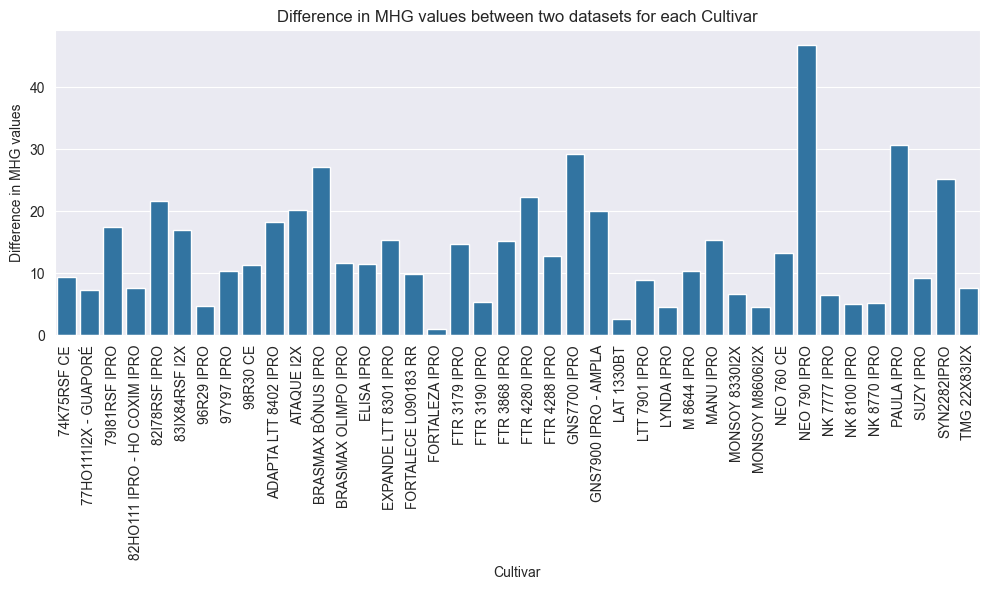

In [34]:
show_delta(df, "MHG")

# Detect and remove outliers

<Axes: >

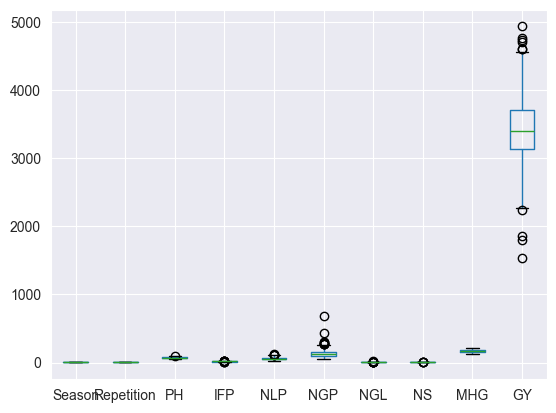

In [35]:
df.boxplot()

C:\Users\Adrian\OneDrive\Desktop\ML_Projects\Agriculture_Regression_Clustering\eda_module.py:93: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\Adrian\OneDrive\Desktop\ML_Projects\Agriculture_Regression_Clustering\eda_module.py:93: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



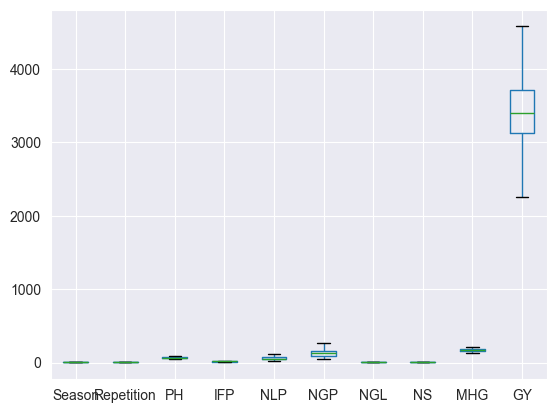

In [36]:
remove_outliers(df)

# Correlation analysis

In [37]:
corelation = df.corr(numeric_only=True)
corelation

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
Season,1.000000e+00,1.725361e-16,0.268222,-0.340246,0.054291,-0.047806,-0.146767,-0.512852,0.307912,-0.025511
Repetition,1.725361e-16,1.000000e+00,0.000933,0.012074,0.003682,0.003301,-0.034513,-0.004257,0.013688,0.000996
PH,2.682217e-01,9.333147e-04,1.000000,0.320967,0.175478,0.098322,-0.140249,-0.046962,-0.044809,0.123583
IFP,-3.402464e-01,1.207421e-02,0.320967,1.000000,0.051386,0.022766,-0.086417,0.353748,-0.082637,0.134236
NLP,5.429143e-02,3.682336e-03,0.175478,0.051386,1.000000,0.816120,-0.057597,0.528194,-0.001709,0.192032
NGP,-4.780610e-02,3.301084e-03,0.098322,0.022766,0.816120,1.000000,0.392872,0.504040,0.014056,0.262969
NGL,-1.467672e-01,-3.451298e-02,-0.140249,-0.086417,-0.057597,0.392872,1.000000,0.079264,-0.014765,0.082048
NS,-5.128516e-01,-4.257289e-03,-0.046962,0.353748,0.528194,0.504040,0.079264,1.000000,-0.136500,0.167536
MHG,3.079121e-01,1.368809e-02,-0.044809,-0.082637,-0.001709,0.014056,-0.014765,-0.136500,1.000000,0.072453
GY,-2.551055e-02,9.960764e-04,0.123583,0.134236,0.192032,0.262969,0.082048,0.167536,0.072453,1.000000


<Axes: >

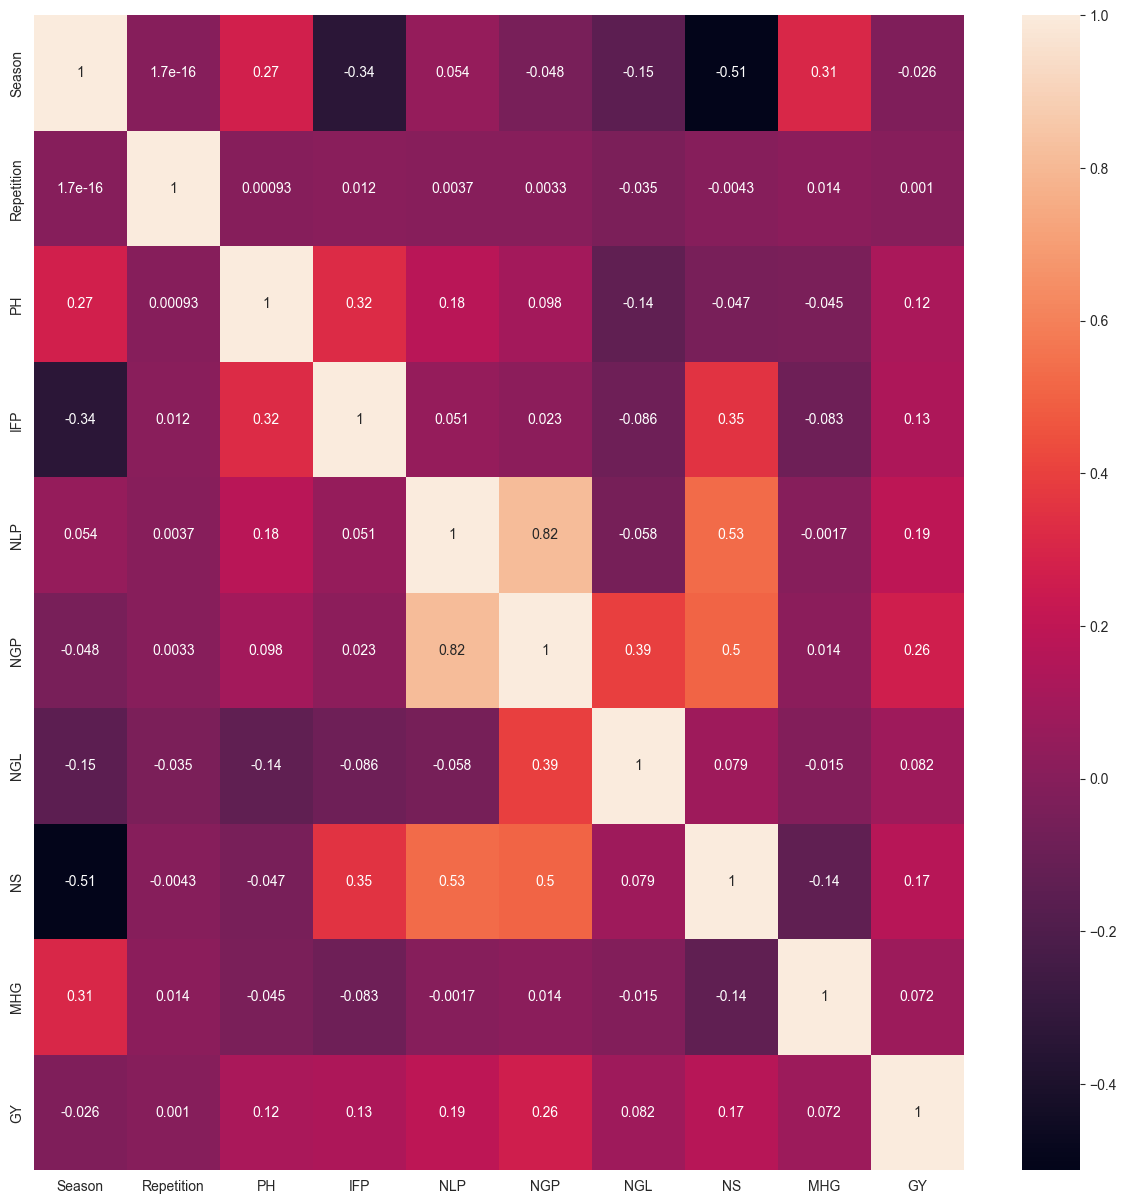

In [38]:
plt.subplots(figsize=(15,15))
sns.heatmap(corelation, xticklabels=True, yticklabels=True, annot=True)

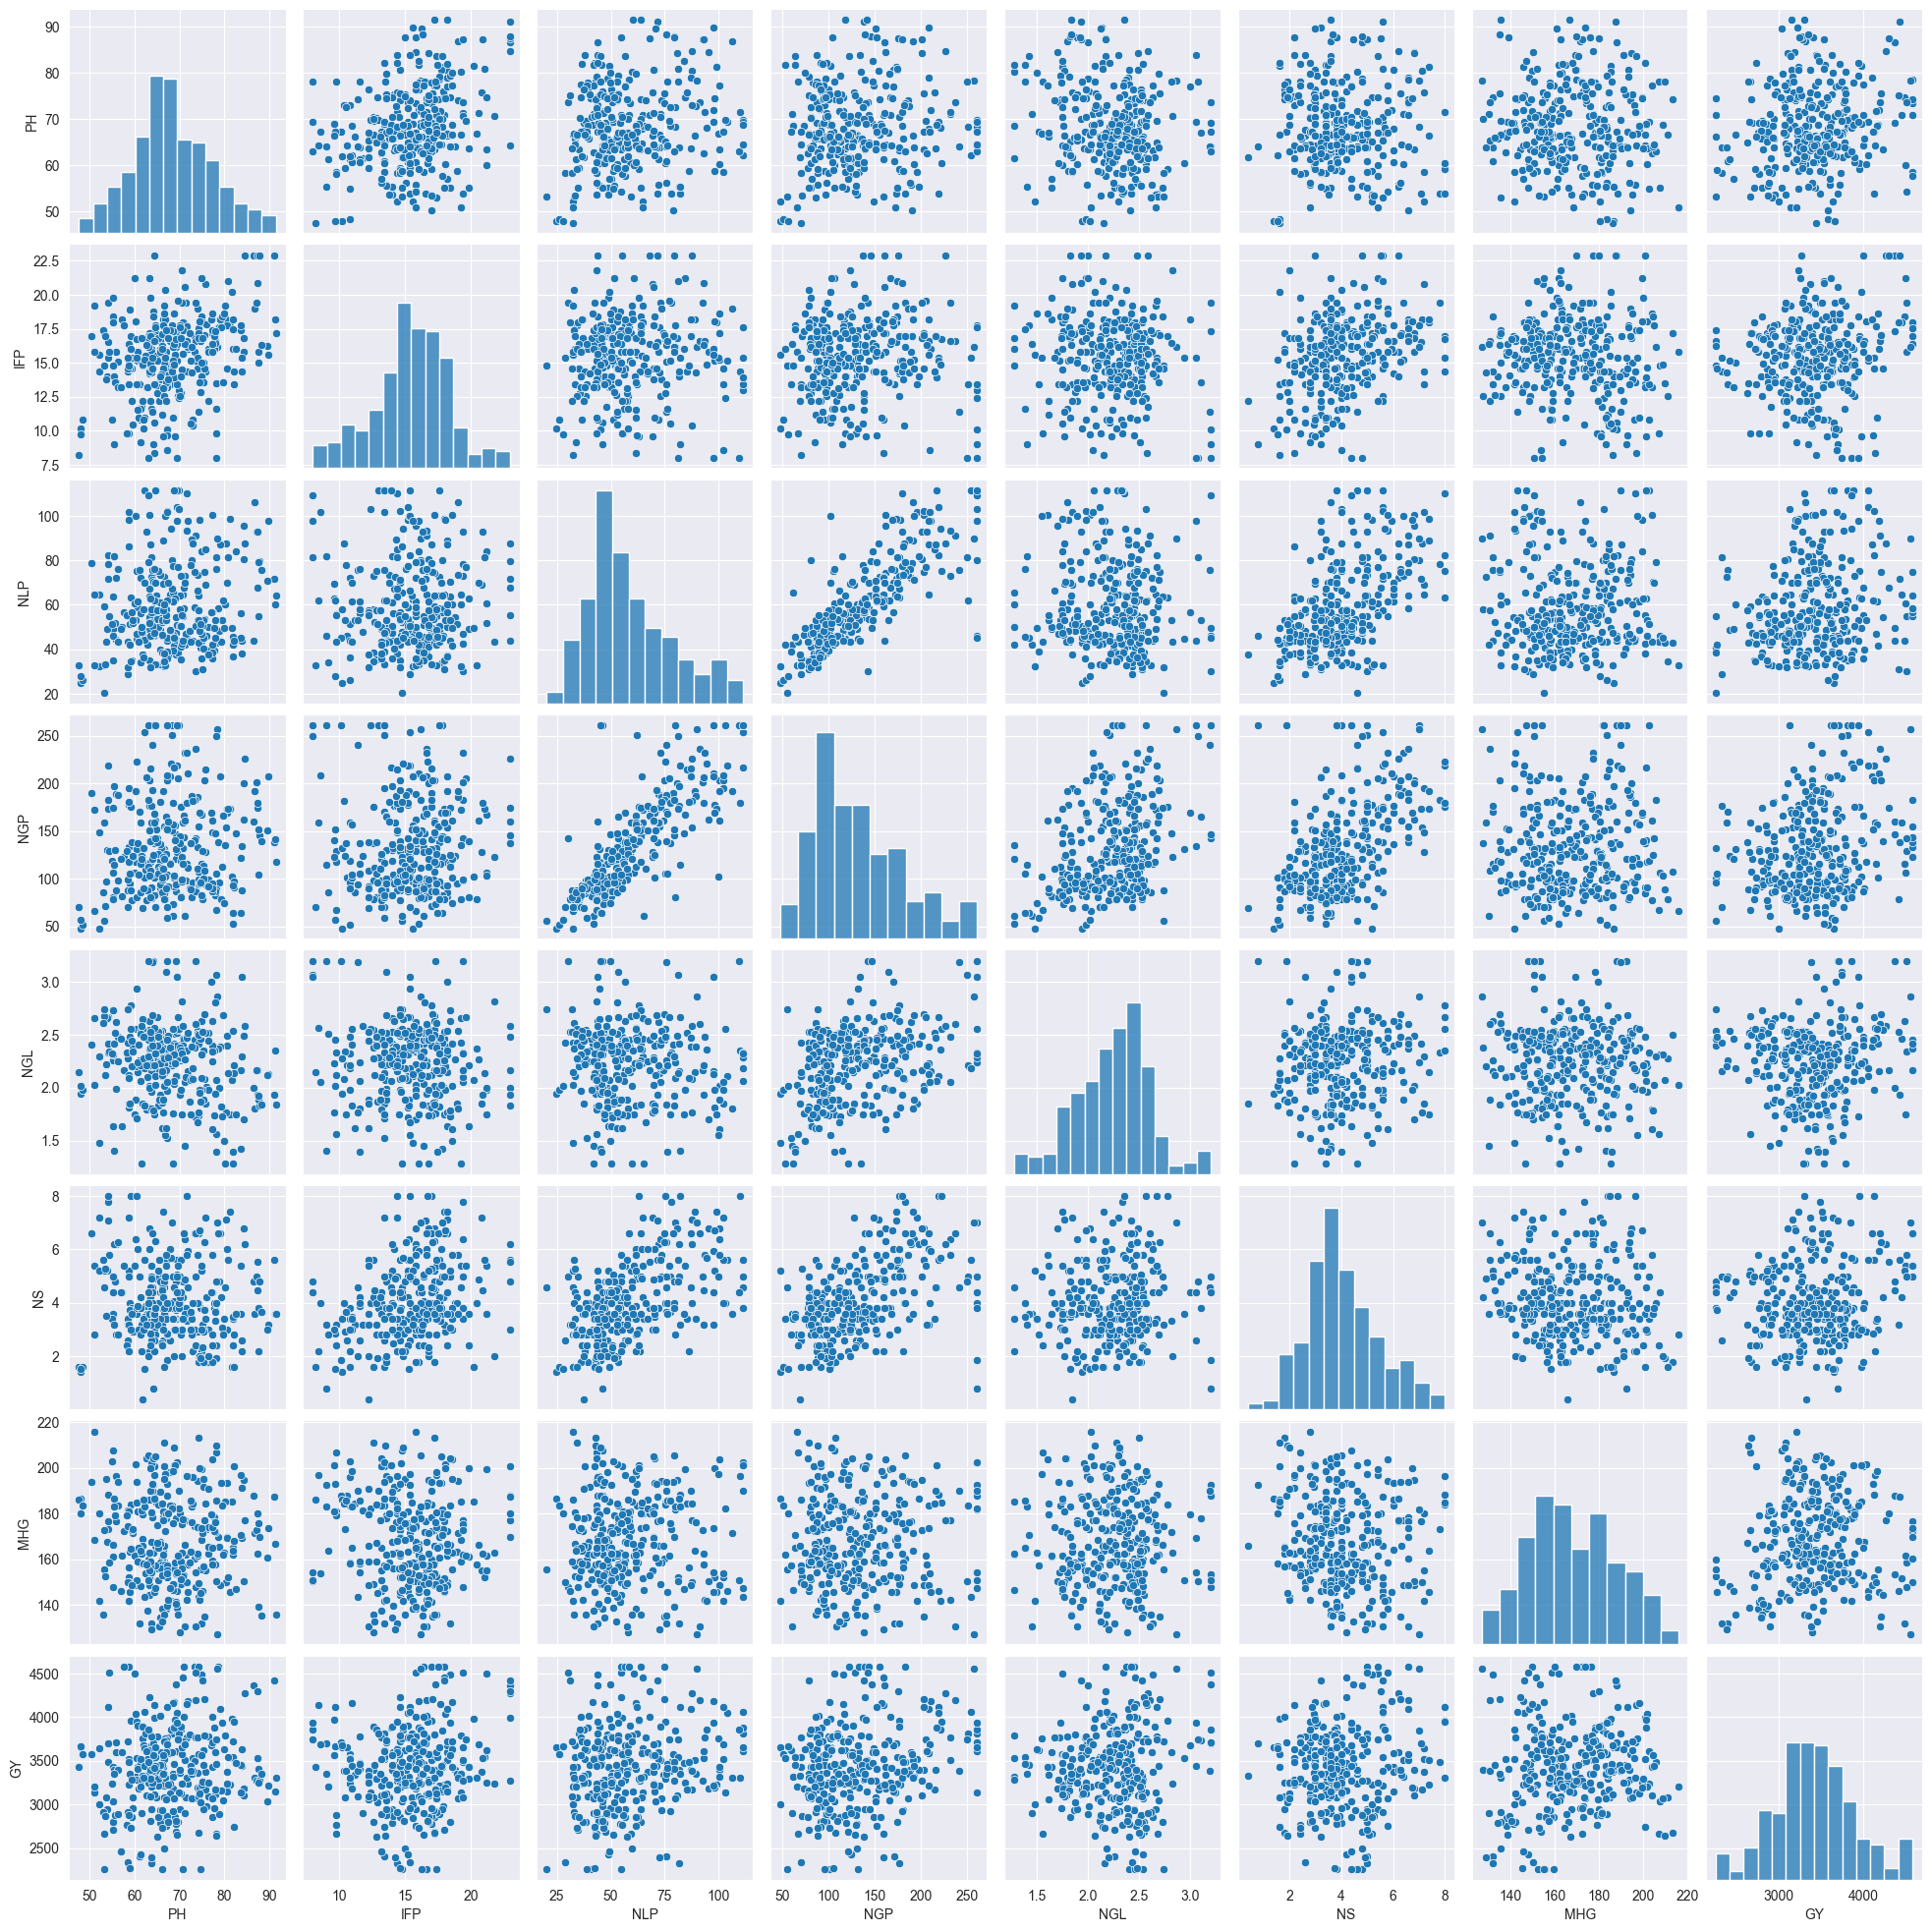

In [39]:
sns.pairplot(df.drop(columns=['Season', 'Repetition']))

# Preparing the dataset for clustering

In [40]:
# Compute the average for each cultivar and drop the Season and Repetition columns
clustering_dataset = df.groupby('Cultivar', as_index=False).mean().drop(columns=['Season', 'Repetition'])
clustering_dataset

,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,74K75RSF CE,72.232500,15.100000,57.966250,132.600000,2.29375,4.33250,165.61250,3374.793606
1,77HO111I2X - GUAPORÉ,51.000000,13.132500,49.733750,114.900000,2.22000,4.30000,180.39375,3594.796968
2,79I81RSF IPRO,66.032500,12.600000,63.200000,151.666250,2.40750,3.90000,188.65000,3527.056063
3,82HO111 IPRO - HO COXIM IPRO,62.500000,14.500000,92.288125,199.024062,2.27125,5.43375,193.90875,3600.278290
4,82I78RSF IPRO,73.100000,17.574375,67.600000,142.266250,2.20500,4.10000,158.26750,2858.790647
5,83IX84RSF I2X,76.833750,16.733750,71.700000,137.000000,1.77875,4.70000,156.53000,3828.827687
6,96R29 IPRO,64.833750,15.600000,42.400000,102.500000,2.45500,3.63375,158.09125,2489.056466
7,97Y97 IPRO,65.700000,17.266250,52.132500,122.833750,2.31000,4.43375,173.72625,2988.823190
8,98R30 CE,73.532500,15.932500,76.733750,170.390781,2.40625,5.00000,175.69000,3881.568994
9,ADAPTA LTT 8402 IPRO,58.567500,14.133750,54.900000,123.066250,2.25625,4.16625,169.60875,3725.132586


# Visualize data in 3D using dimensionality reduction

In [41]:
visualize_3d(clustering_dataset)

C:\Users\Adrian\OneDrive\Desktop\ML_Projects\Agriculture_Regression_Clustering\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Apply KMeans

In [42]:
clustering_dataset = kmeans(clustering_dataset)

c1 = clustering_dataset[clustering_dataset.cluster == 0]
c2 = clustering_dataset[clustering_dataset.cluster == 1]
c3 = clustering_dataset[clustering_dataset.cluster == 2]

print(len(c1))
print(len(c2))
print(len(c3))

C:\Users\Adrian\OneDrive\Desktop\ML_Projects\Agriculture_Regression_Clustering\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



9
17
14


In [43]:
c1

,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY,cluster
5,83IX84RSF I2X,76.83375,16.73375,71.700000,137.000000,1.77875,4.70000,156.53000,3828.827687,0
8,98R30 CE,73.53250,15.93250,76.733750,170.390781,2.40625,5.00000,175.69000,3881.568994,0
9,ADAPTA LTT 8402 IPRO,58.56750,14.13375,54.900000,123.066250,2.25625,4.16625,169.60875,3725.132586,0
12,BRASMAX OLIMPO IPRO,81.33375,18.56250,54.066250,134.933750,2.25875,4.23250,188.86875,3949.030876,0
15,FORTALECE L090183 RR,66.90000,16.46750,45.667500,108.200000,2.16000,2.43250,155.86500,3780.160531,0
16,FORTALEZA IPRO,70.83375,14.86750,63.733750,157.332500,2.41000,5.36750,131.65250,3901.511034,0
29,MONSOY 8330I2X,65.00000,14.43250,55.733750,142.366250,2.54500,4.16750,152.60625,3906.566049,0
33,NK 7777 IPRO,63.86625,13.43250,60.232500,199.739844,2.63000,4.80875,187.92250,3809.043908,0
37,SUZY IPRO,69.30000,14.70000,74.190625,158.766250,2.05500,4.33375,148.68500,3784.036494,0


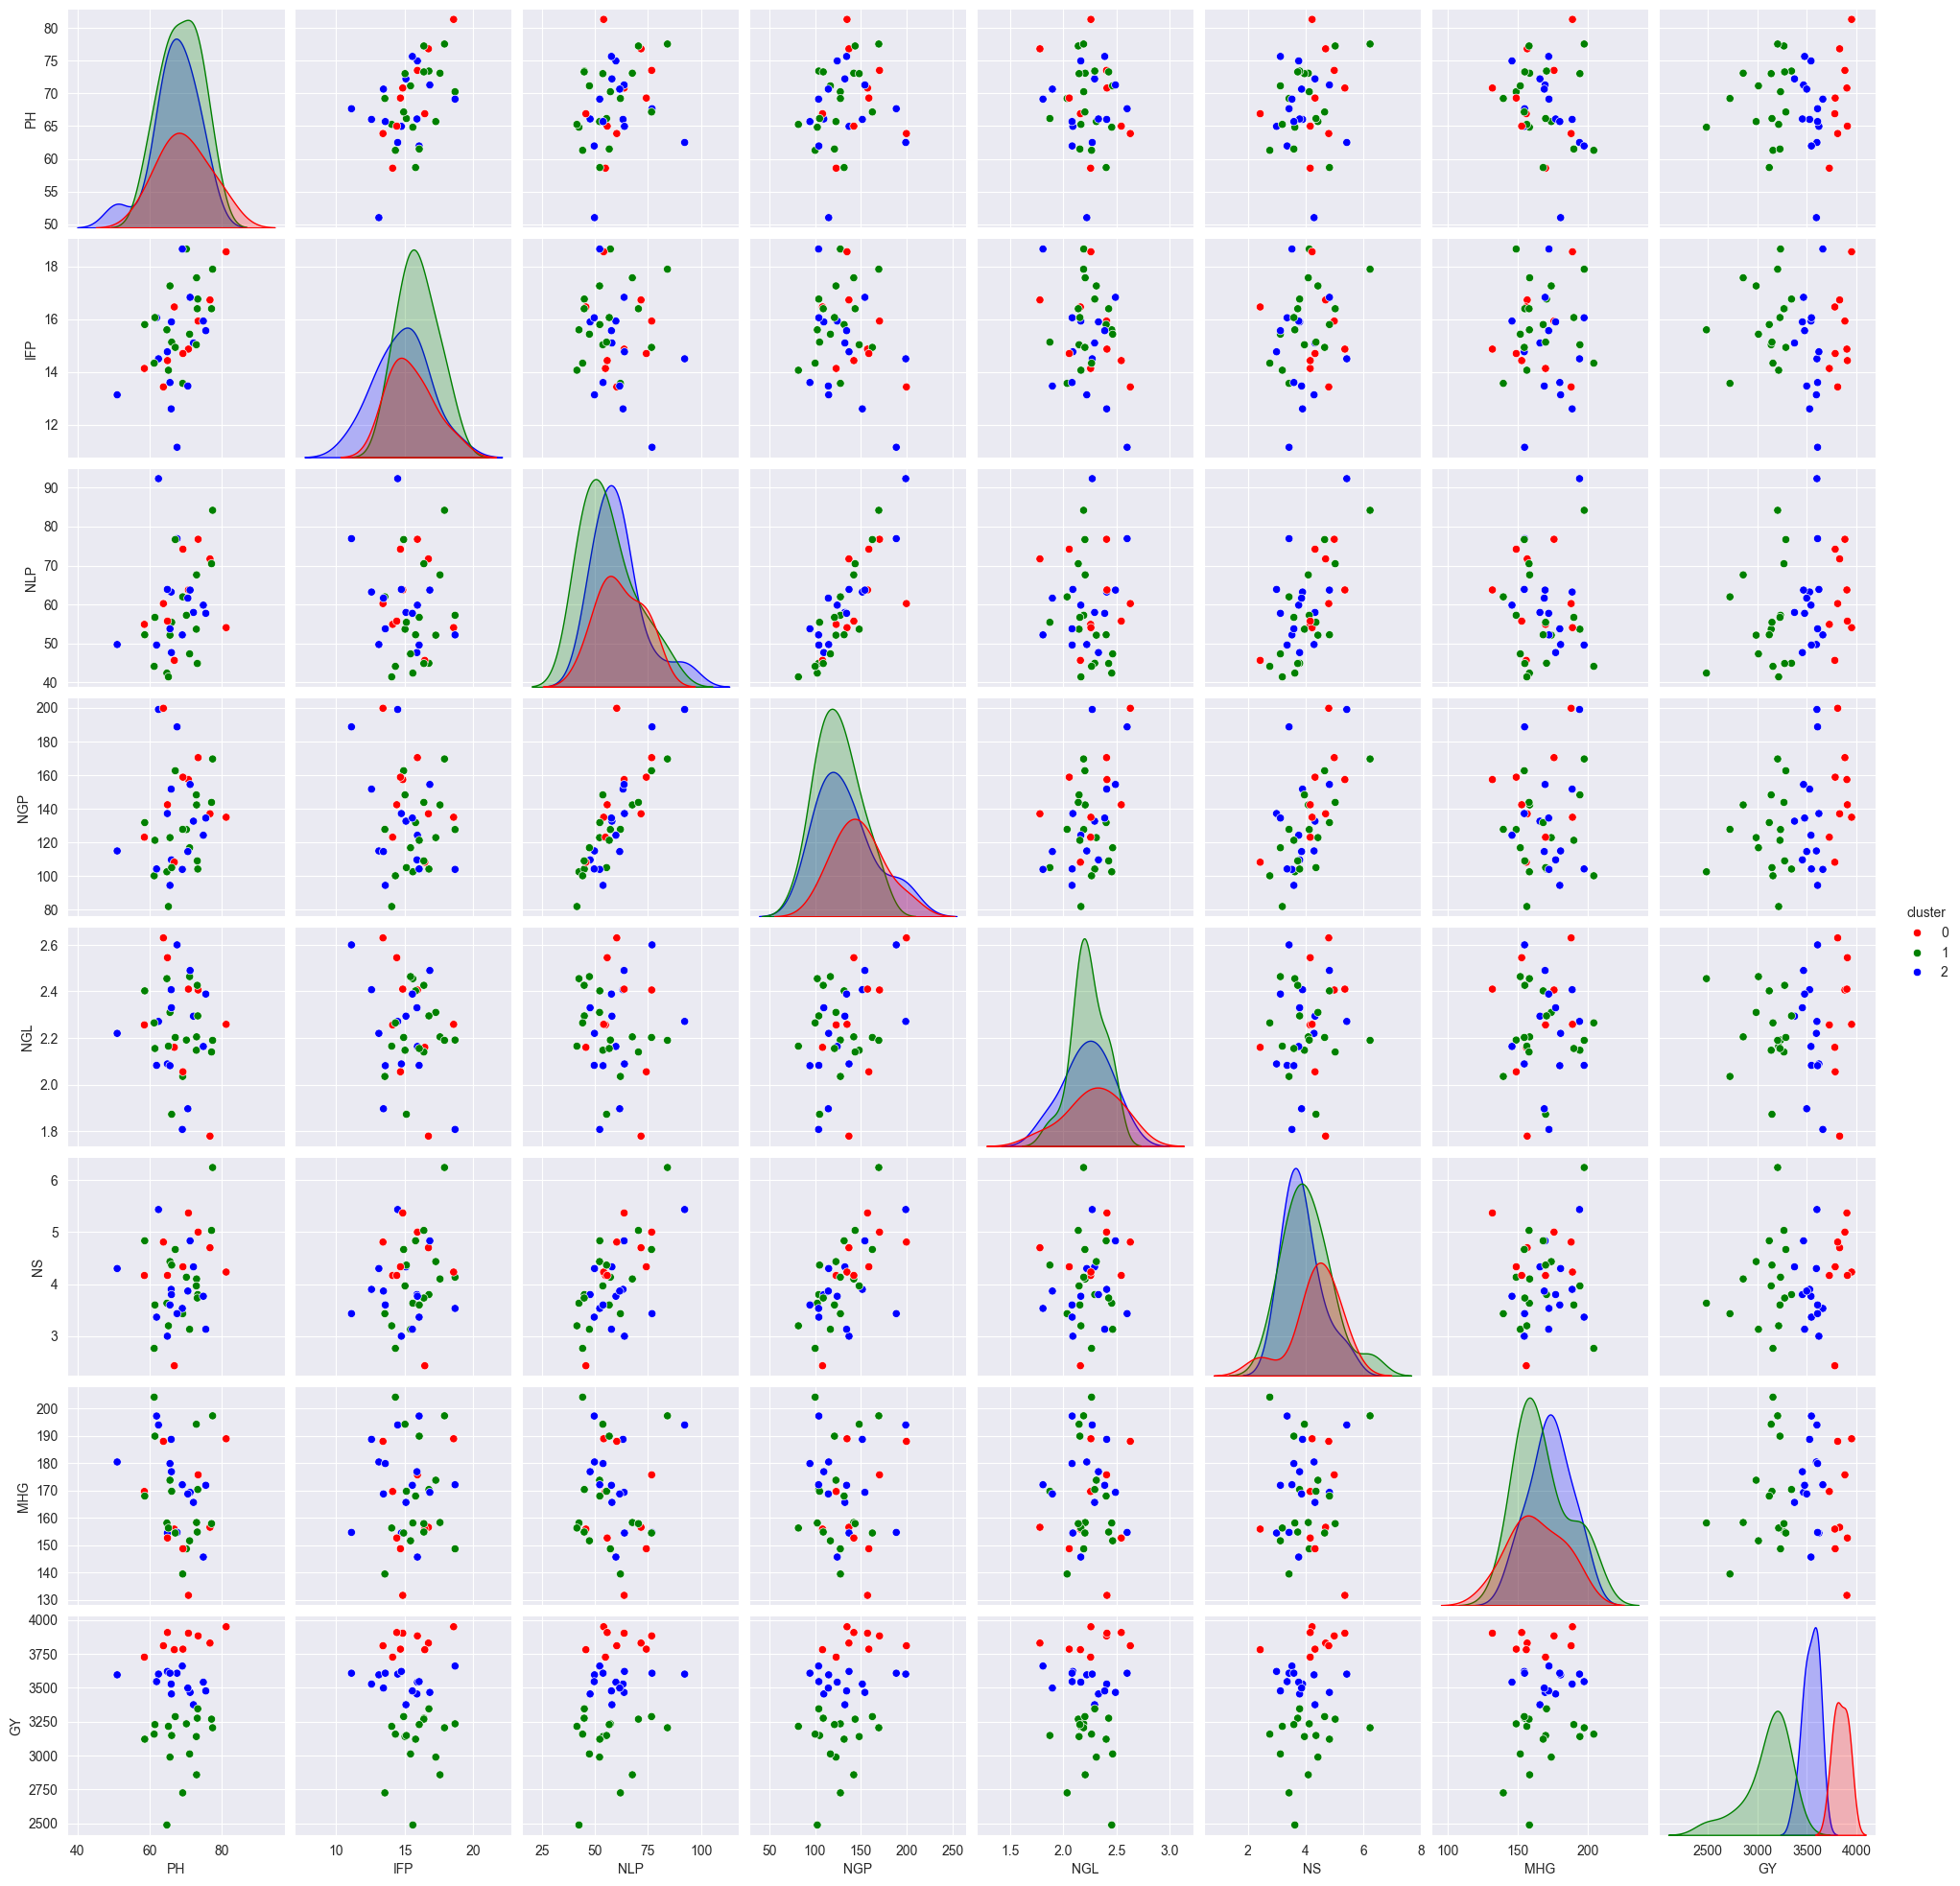

In [44]:
sns.pairplot(clustering_dataset, hue="cluster", palette=['red', 'green', 'blue'])

In [45]:
vizualize_3d_clusters(clustering_dataset)

C:\Users\Adrian\OneDrive\Desktop\ML_Projects\Agriculture_Regression_Clustering\.venv\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Generate synthetic data for regression

In [46]:
regression_df = pd.concat([generate_synthetic_data(df[df['Season'] == 1], 1), generate_synthetic_data(df[df['Season'] == 2], 2)])

# Preprocess data

In [47]:
regression_df = preprocess(regression_df)

# Linear regression

In [48]:
model = regression(regression_df)

Mean Square error: 58.26093162101135
R2 score: 0.8592041107103003


# Predict on initial dataset

In [49]:
initial_data = pd.read_csv('data/data_initial.csv').drop(columns=['Repetition'])
(y_pred, mse, r2) = predict(model, initial_data)

52.25423740423771
0.8639067989490319
Real Y: 152.2
Predicted Y: 143.58590418313875
Real Y: 141.69
Predicted Y: 142.250321620756
Real Y: 148.81
Predicted Y: 143.22040166107064
Real Y: 148.5
Predicted Y: 142.8122691839631
Real Y: 145.59
Predicted Y: 151.94944053182633
Real Y: 154.87
Predicted Y: 152.1355723037143
Real Y: 150.23
Predicted Y: 152.2169687224564
Real Y: 149.9
Predicted Y: 151.80953266482933
Real Y: 180.25
Predicted Y: 172.16174389839074
Real Y: 176.75
Predicted Y: 174.30643129238757


In [50]:
mse

52.25423740423771

In [51]:
r2

0.8639067989490319

In [52]:
mhg_predicted = pd.DataFrame(y_pred, columns=['MHG_Predicted'])
pd.concat([initial_data['MHG'], mhg_predicted], axis=1)

,MHG,MHG_Predicted
0,152.20,143.585904
1,141.69,142.250322
2,148.81,143.220402
3,148.50,142.812269
4,145.59,151.949441
...,...,...
315,135.19,149.570548
316,145.69,157.423133
317,147.24,159.619533
318,156.32,158.842696
